# Task 1

In [ ]:
import pandas as pd
import numpy as np



In [ ]:
#Loading the file
filename = "/content/comp1804_coursework_dataset_23-24.csv"

df_task1 = pd.read_csv(filename)

df_task1.head()

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49,12.0,man,biographies,clear_enough
1,564218010072,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166,47.0,man,artificial intelligence,not_clear_enough
2,291401001672,He went on to win the Royal Medal of the Royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,69,18.0,non-binary,biographies,clear_enough
3,31548004883,The changes have altered many underlying assum...,ORG_NO_PRODUCT_YES_PERSON_NO_,76,27.0,non-binary,programming,clear_enough
4,50634005146,"After these novels were published, Disraeli de...",ORG_YES_PRODUCT_YES_PERSON_YES_,200,47.0,man,biographies,not_clear_enough


In [ ]:
# Getting columns name in the dataset
df_task1.columns

Index(['par_id', 'paragraph', 'has_entity', 'lexicon_count', 'difficult_words',
       'last_editor_gender', 'category', 'text_clarity'],
      dtype='object')

In [ ]:
#dimension of the dataset
df_task1.shape

(9347, 8)

In [ ]:
# getting the missing values from the data
print(df_task1.isnull().sum())

par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words         18
last_editor_gender       0
category                61
text_clarity          9338
dtype: int64


In [ ]:
#dropping the text_clarity column as it is not relevant for task1
df_task1.drop('text_clarity', axis=1, inplace=True)

In [ ]:
#  remove rows containing missing values
df_task1.dropna(inplace=True)
df_task1.shape

(9268, 7)

In [ ]:
print(df_task1.isnull().sum())

par_id                0
paragraph             0
has_entity            0
lexicon_count         0
difficult_words       0
last_editor_gender    0
category              0
dtype: int64


In [ ]:
#used to count the occurrences of each unique value in the column named 'has_entity'
df_task1['has_entity'].value_counts()

ORG_YES_PRODUCT_NO_PERSON_YES_     3029
ORG_NO_PRODUCT_NO_PERSON_NO_       2851
ORG_YES_PRODUCT_NO_PERSON_NO_      1462
ORG_NO_PRODUCT_NO_PERSON_YES_      1373
ORG_YES_PRODUCT_YES_PERSON_YES_     298
ORG_YES_PRODUCT_YES_PERSON_NO_      125
ORG_NO_PRODUCT_YES_PERSON_YES_       64
ORG_NO_PRODUCT_YES_PERSON_NO_        42
data missing                         24
Name: has_entity, dtype: int64

In [ ]:
#used to count the occurrences of each unique value in the column named 'last_editor_gender'
df_task1['last_editor_gender'].value_counts()

man                  6193
woman                2442
non-binary            359
prefer_not_to_say     274
Name: last_editor_gender, dtype: int64

In [ ]:
#used to count the occurrences of each unique value in the column named 'category'
df_task1['category'].value_counts()

biographies                             2937
philosophy                              2580
programming                             1977
artificial intelligence                 1560
movies about artificial intelligence     166
Philosophy                                13
Biographies                               13
Artificial intelligence                   11
Programming                               10
Movies about artificial intelligence       1
Name: category, dtype: int64

In [ ]:
# This mapping will help fix the duplication
category_mapping = {
    'Philosophy': 'philosophy',
    'Biographies': 'biographies',
    'Programming': 'programming',
    'Artificial intelligence': 'artificial intelligence',
    'Movies about artificial intelligence': 'movies about artificial intelligence'
}

# Replace category names
df_task1['category'].replace(category_mapping, inplace=True)

print(df_task1['category'].value_counts())

biographies                             2950
philosophy                              2593
programming                             1987
artificial intelligence                 1571
movies about artificial intelligence     167
Name: category, dtype: int64


In [ ]:
#making new dataframe containing only three following columns
final_df = df_task1[['has_entity', 'paragraph', 'category']]

final_df.head()

,has_entity,paragraph,category
0,ORG_YES_PRODUCT_NO_PERSON_YES_,Ramsay was born in Glasgow on 2 October 1852. ...,biographies
1,ORG_YES_PRODUCT_NO_PERSON_NO_,It has been widely estimated for at least the ...,artificial intelligence
2,ORG_YES_PRODUCT_NO_PERSON_NO_,He went on to win the Royal Medal of the Royal...,biographies
3,ORG_NO_PRODUCT_YES_PERSON_NO_,The changes have altered many underlying assum...,programming
4,ORG_YES_PRODUCT_YES_PERSON_YES_,"After these novels were published, Disraeli de...",biographies


In [ ]:
#importing the nltk library
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Label encode the columns
label_encoder = LabelEncoder()
final_df['has_entity'] = label_encoder.fit_transform(final_df['has_entity'])
final_df['category'] = label_encoder.fit_transform(final_df['category'])

# Tokenization and stopword removal from paragraph column
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#Convert the text to lowercase.
#Remove any characters that are not alphabetic or whitespace.
#Tokenize the text into words using the NLTK library's word_tokenize function.
#Lemmatize each word using a lemmatizer.
#Filter out any words that are in a set of stop words.

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words]
    return tokens

final_df['paragraph'] = final_df['paragraph'].apply(preprocess_text)
final_df['paragraph'] = final_df['paragraph'].apply(lambda x: ' '.join(x))
final_df

<ipython-input-78-feb88206faf5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['has_entity'] = label_encoder.fit_transform(final_df['has_entity'])
<ipython-input-78-feb88206faf5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['category'] = label_encoder.fit_transform(final_df['category'])
<ipython-input-78-feb88206faf5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,has_entity,paragraph,category
0,5,ramsay born glasgow october nephew geologist s...,1
1,4,widely estimated least last generation program...,0
2,4,went win royal medal royal society copley meda...,1
3,2,change altered many underlying assumption righ...,4
4,7,novel published disraeli declared would write ...,1
...,...,...,...
9342,5,sir joseph dalton hooker british botanist expl...,1
9343,5,successful invasion india generally came afgha...,1
9344,5,hawking born january oxford frank isobel eilee...,1
9345,4,complex task making custom data entry form wor...,4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import numpy as np

# Define features (X) and target variable (y)
X = final_df[['has_entity', 'paragraph']]
y = final_df['category']

# Vectorize text data using Bag of Words
bow_vectorizer = CountVectorizer()
X_vectorized = bow_vectorizer.fit_transform(X['paragraph'])

# Concatenate 'has_entity' column with the vectorized paragraph data
X_vectorized = np.concatenate((X[['has_entity']].values, X_vectorized.toarray()), axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Predict on test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       292
           1       0.95      0.91      0.93       628
           2       0.94      0.78      0.85        37
           3       0.89      0.95      0.92       503
           4       0.98      0.94      0.96       394

    accuracy                           0.93      1854
   macro avg       0.93      0.90      0.91      1854
weighted avg       0.93      0.93      0.93      1854



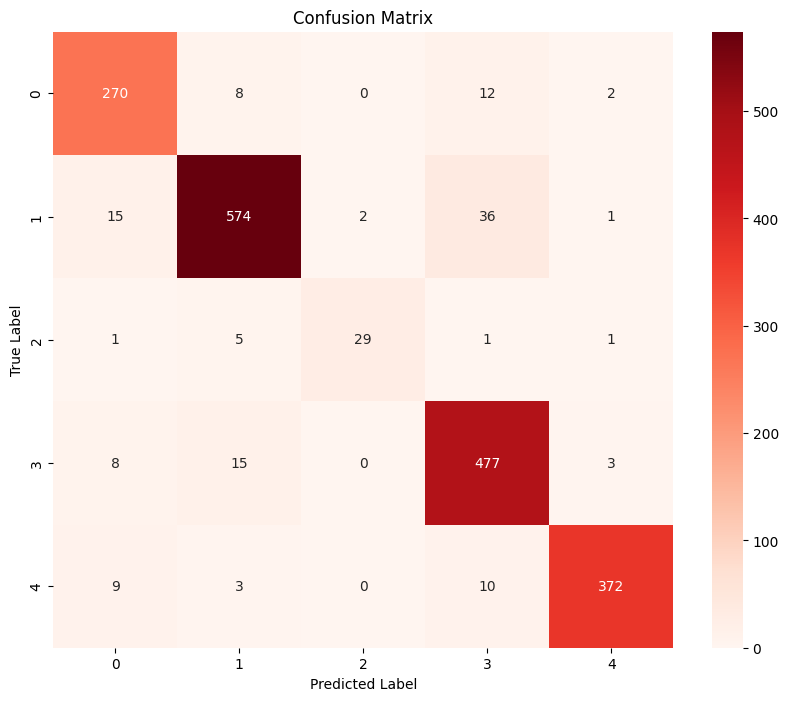

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=naive_bayes_classifier.classes_, yticklabels=naive_bayes_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# calculates and prints the proportions of each unique value in the target variable y.
measure_proportions = y.value_counts() / len(y)
print(measure_proportions)

1    0.318300
3    0.279780
4    0.214394
0    0.169508
2    0.018019
Name: category, dtype: float64


# Task 2

In [ ]:
import pandas as pd

filename = "comp1804_coursework_dataset_23-24.csv"

df = pd.read_csv(filename)

# Subsetting data
df = df.head(100)

#replaces the original paragraphs with the preprocessed tokens.
df['paragraph'] = df['paragraph'].apply(preprocess_text)
#converts the list of preprocessed tokens back into a single string for each paragraph
df['paragraph'] = df['paragraph'].apply(lambda x: ' '.join(x))
#applies label encoding to the 'has_entity' column
df['has_entity'] = label_encoder.fit_transform(df['has_entity'])
df['category'] = label_encoder.fit_transform(df['category'])
df = pd.get_dummies(df, columns=['last_editor_gender'])
df.drop('par_id', axis=1, inplace=True)
df['text_clarity'] = label_encoder.fit_transform(df['text_clarity'])

In [ ]:
df

,paragraph,has_entity,lexicon_count,difficult_words,category,text_clarity,last_editor_gender_man,last_editor_gender_non-binary,last_editor_gender_prefer_not_to_say,last_editor_gender_woman
0,ramsay born glasgow october nephew geologist s...,5,49,12.0,2,0,1,0,0,0
1,widely estimated least last generation program...,4,166,47.0,1,1,1,0,0,0
2,went win royal medal royal society copley meda...,4,69,18.0,2,0,0,1,0,0
3,change altered many underlying assumption righ...,2,76,27.0,5,0,0,1,0,0
4,novel published disraeli declared would write ...,6,200,47.0,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
95,astbury fourth child seven born longton stokeo...,5,145,29.0,2,2,0,0,0,1
96,original greek sense loosening releasing geome...,1,44,15.0,4,2,1,0,0,0
97,beginning act creation god traditional christi...,0,16,4.0,4,2,1,0,0,0
98,scratch lab display experiment scratch team in...,4,31,11.0,5,2,0,1,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'paragraph' column
X_tfidf = tfidf_vectorizer.fit_transform(df['paragraph'])

# Convert the sparse matrix to a DataFrame
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the TF-IDF features with the original DataFrame
df_new = pd.concat([df, df_tfidf], axis=1)

df_new

,paragraph,has_entity,lexicon_count,difficult_words,category,text_clarity,last_editor_gender_man,last_editor_gender_non-binary,last_editor_gender_prefer_not_to_say,last_editor_gender_woman,...,yearin,yearold,york,younger,yuanmingyuan,zarathustra,zealand,zenon,zero,zionism
0,ramsay born glasgow october nephew geologist s...,5,49,12.0,2,0,1,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,widely estimated least last generation program...,4,166,47.0,1,1,1,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,went win royal medal royal society copley meda...,4,69,18.0,2,0,0,1,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,change altered many underlying assumption righ...,2,76,27.0,5,0,0,1,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,novel published disraeli declared would write ...,6,200,47.0,2,1,1,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,astbury fourth child seven born longton stokeo...,5,145,29.0,2,2,0,0,0,1,...,0.0,0.0,0.0,0.105645,0.0,0.0,0.0,0.0,0.0,0.0
96,original greek sense loosening releasing geome...,1,44,15.0,4,2,1,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
97,beginning act creation god traditional christi...,0,16,4.0,4,2,1,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
98,scratch lab display experiment scratch team in...,4,31,11.0,5,2,0,1,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_new.drop('paragraph', axis=1, inplace=True)
df_new

,has_entity,lexicon_count,difficult_words,category,text_clarity,last_editor_gender_man,last_editor_gender_non-binary,last_editor_gender_prefer_not_to_say,last_editor_gender_woman,abbreviation,...,yearin,yearold,york,younger,yuanmingyuan,zarathustra,zealand,zenon,zero,zionism
0,5,49,12.0,2,0,1,0,0,0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,4,166,47.0,1,1,1,0,0,0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,4,69,18.0,2,0,0,1,0,0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,2,76,27.0,5,0,0,1,0,0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,6,200,47.0,2,1,1,0,0,0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,145,29.0,2,2,0,0,0,1,0.0,...,0.0,0.0,0.0,0.105645,0.0,0.0,0.0,0.0,0.0,0.0
96,1,44,15.0,4,2,1,0,0,0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
97,0,16,4.0,4,2,1,0,0,0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
98,4,31,11.0,5,2,0,1,0,0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_new.isnull().sum()
df_new = df_new.dropna()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#dropping the text_clarity column
X = df_new.drop('text_clarity', axis=1)
#Creating new text_clarity column
y = df_new['text_clarity']

#training the model by applying logistic regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train, y_train)

y_pred = logistic_regression_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.30      0.33      0.32        20
weighted avg       0.81      0.90      0.85        20



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
# TO download the task 2 excel file
import pandas as pd
from google.colab import files

# Export the specific DataFrame to an Excel file
df.to_excel("specific_dataframe.xlsx", index=False)

# Download the Excel file
files.download("specific_dataframe.xlsx")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>